In [1]:
import pandas as pd
import math
from scipy.stats import zscore

In [2]:
dados = pd.read_csv('Cidades-mp-2.5-novo-meses-imputados.csv',sep=';',encoding = "ISO-8859-1")

In [3]:
dados.head()

,cidade,jan_2017,fev_2017,mar_2017,abr_2017,mai_2017,jun_2017,jul_2017,ago_2017,set_2017,...,mar_2018,abr_2018,mai_2018,jun_2018,jul_2018,ago_2018,set_2018,out_2018,nov_2018,dez_2018
0,Santos-Ponta da Praia,13,18,12,12,14,20,21,18,23,...,14,16,16,18,20,14,13,11,10,14
1,Santana,11,11,15,17,17,19,21,20,29,...,15,17,19,21,29,16,17,13,11,15
2,Parque D.Pedro II,11,14,12,11,16,19,21,22,32,...,15,17,20,24,34,17,18,13,12,17
3,Congonhas,13,17,14,14,17,20,20,21,30,...,18,19,20,27,32,17,18,15,14,16
4,Ibirapuera,10,13,10,10,15,17,19,20,31,...,15,16,18,20,28,12,14,10,10,12


In [4]:


#Apresenta a quantidade de valores nulos por mes
print(dados.isna().sum())



cidade      0
jan_2017    0
fev_2017    0
mar_2017    0
abr_2017    0
mai_2017    0
jun_2017    0
jul_2017    0
ago_2017    0
set_2017    0
out_2017    0
nov_2017    0
dez_2017    0
jan_2018    0
fev_2018    0
mar_2018    0
abr_2018    0
mai_2018    0
jun_2018    0
jul_2018    0
ago_2018    0
set_2018    0
out_2018    0
nov_2018    0
dez_2018    0
dtype: int64


In [5]:
dados_Limpeza=dados

In [6]:

dados_Limpeza.drop("cidade", axis=1, inplace=True)
#dados_Limpeza.apply(zscore)

In [7]:
##Aplicar o algoritmo k-medoid

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

Número de Cluster:  2 - valor Coeficiente:  0.2644541398559192
Número de Cluster:  3 - valor Coeficiente:  0.27057176121292015
Número de Cluster:  4 - valor Coeficiente:  0.15402760752724384
Número de Cluster:  5 - valor Coeficiente:  0.19954588797465597
Número de Cluster:  6 - valor Coeficiente:  0.14144576762265684
Número de Cluster:  7 - valor Coeficiente:  0.1622160259962173
Número de Cluster:  8 - valor Coeficiente:  0.17877815775423736
Número de Cluster:  9 - valor Coeficiente:  0.13158748992080258
Número de Cluster:  10 - valor Coeficiente:  0.1324713414405244
Número de Cluster:  11 - valor Coeficiente:  0.13719084575217513
Número de Cluster:  12 - valor Coeficiente:  0.11995316631549087
Número de Cluster:  13 - valor Coeficiente:  0.13032179675089925
Número de Cluster:  14 - valor Coeficiente:  0.08025453862487068
Número de Cluster:  15 - valor Coeficiente:  0.08639060013104795
Número de Cluster:  16 - valor Coeficiente:  0.0917528935849506
Número de Cluster:  17 - valor Coefic

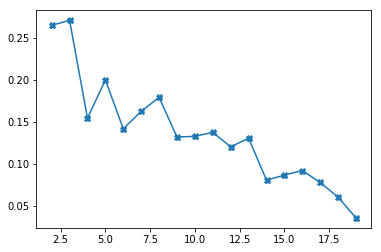

In [49]:
#encontrando o melhor k
silhouette = []
std_data = StandardScaler().fit_transform(dados_Limpeza)
for i in range(2,20):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=1234)
    pred= kmeans.fit_predict(std_data)
    score_sillhoute = silhouette_score (std_data, pred, metric='euclidean')
    print('Número de Cluster: ',i,'- valor Coeficiente: ',score_sillhoute)
    silhouette.append((i,score_sillhoute,))  
plt.plot([w[0] for w in silhouette],[w[1] for w in silhouette], marker="X")



In [45]:
##Pela Vizualização o mrlhor numero de grupo foi 3

In [50]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1234)
kmeans.fit(std_data)
cluster_list = kmeans.labels_


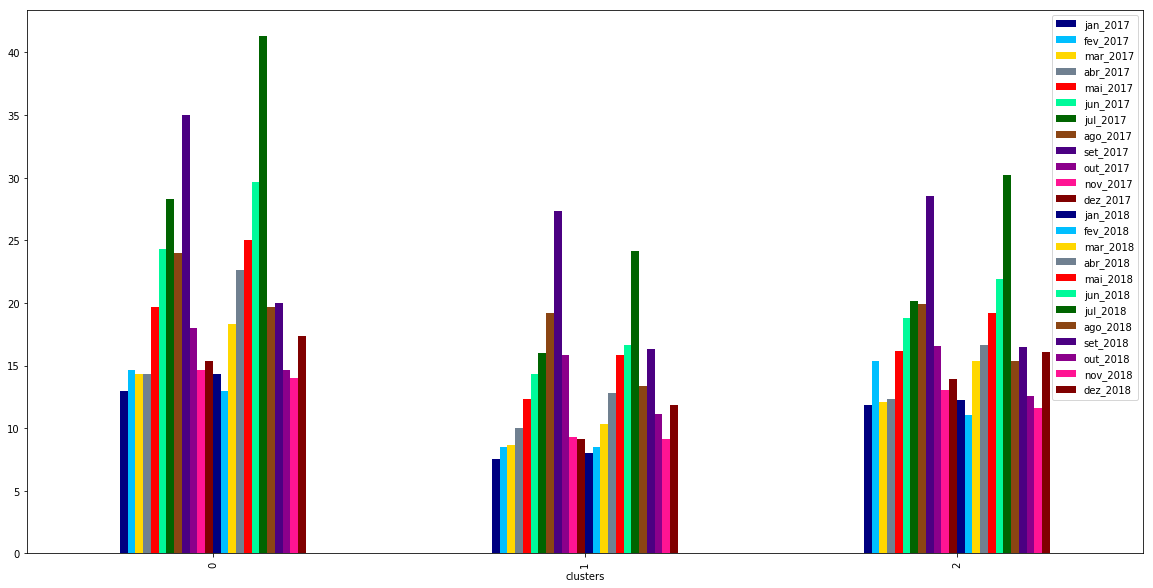

In [51]:
colores=['#000080', '#00BFFF', '#FFD700', '#708090', '#FF0000', '#00FA9A', '#006400', '#8B4513', '#4B0082','#8B008B','#FF1493', '#800000','#000080', '#00BFFF', '#FFD700', '#708090', '#FF0000', '#00FA9A', '#006400', '#8B4513', '#4B0082','#8B008B','#FF1493', '#800000']
dados_Limpeza["clusters"] = cluster_list
dados_Limpeza.groupby("clusters").aggregate("mean").plot(kind = 'bar',color=colores, figsize=(20, 10), fontsize = 10)


C:\Users\Mirellebueno\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


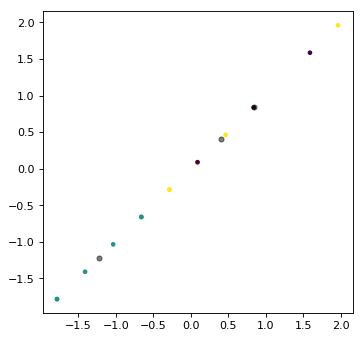

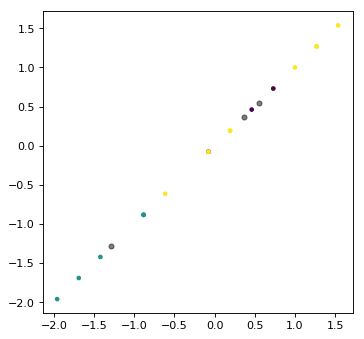

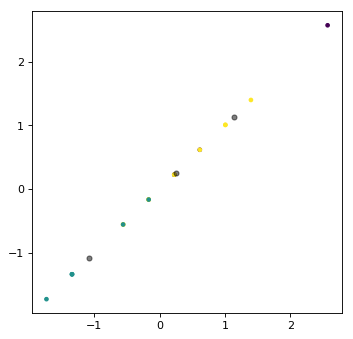

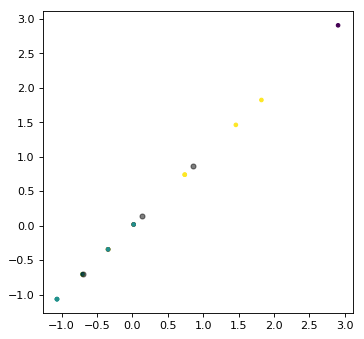

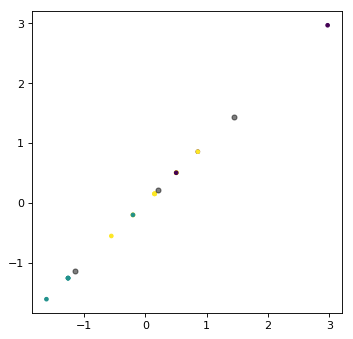

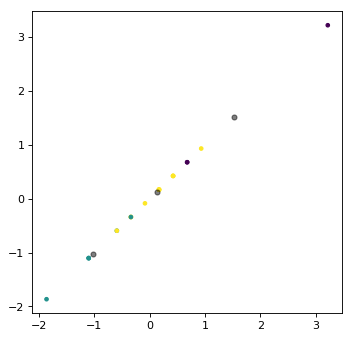

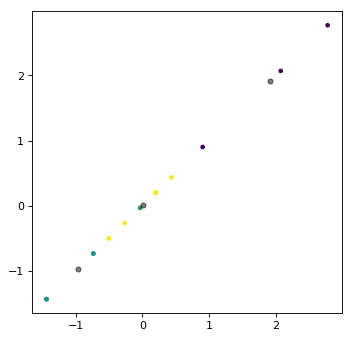

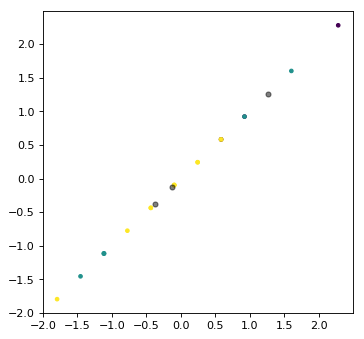

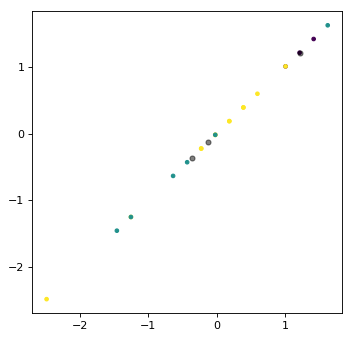

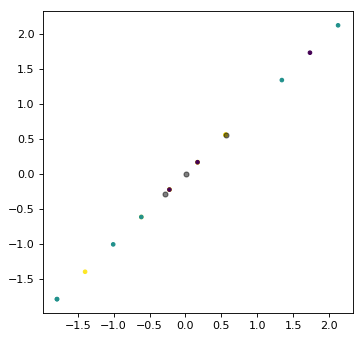

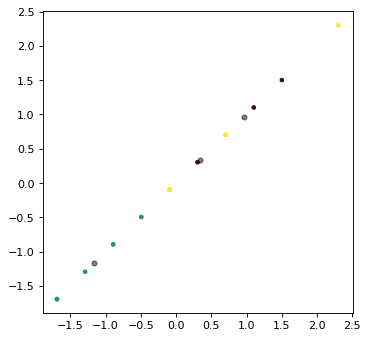

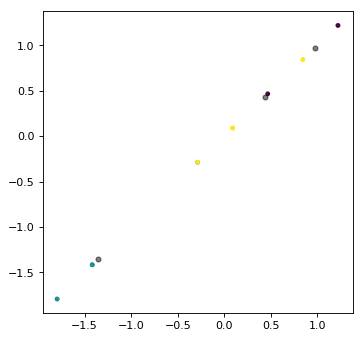

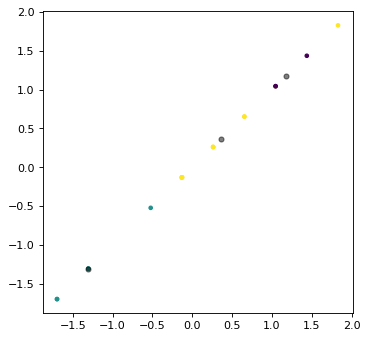

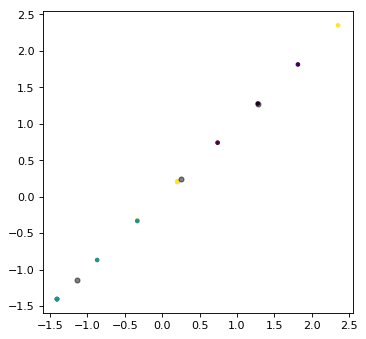

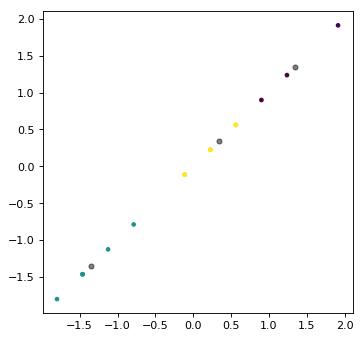

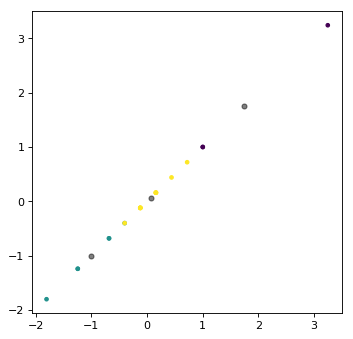

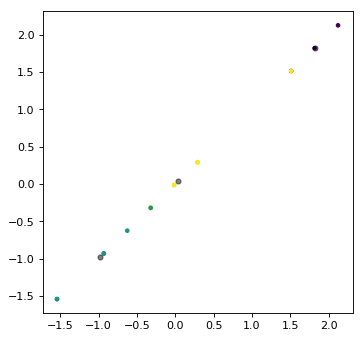

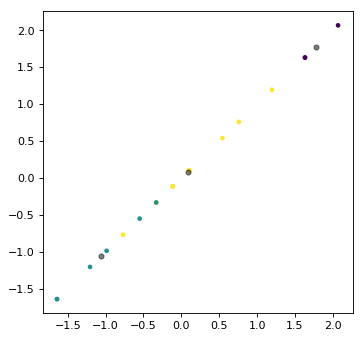

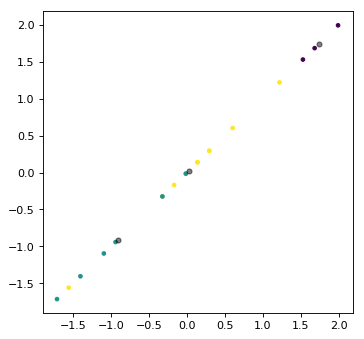

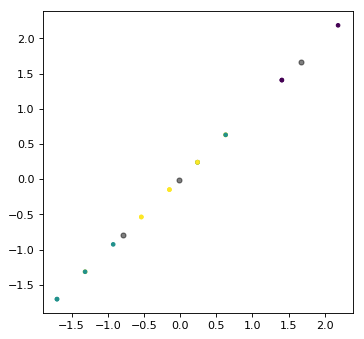

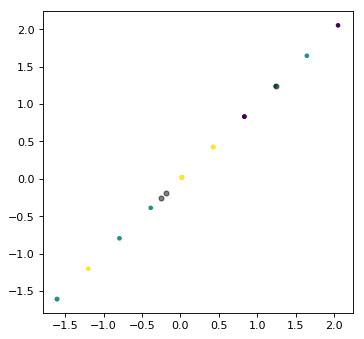

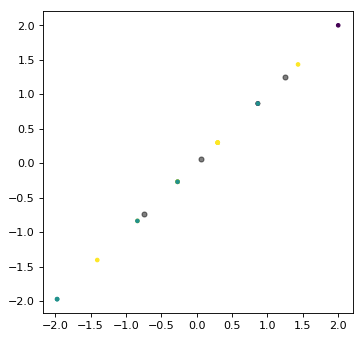

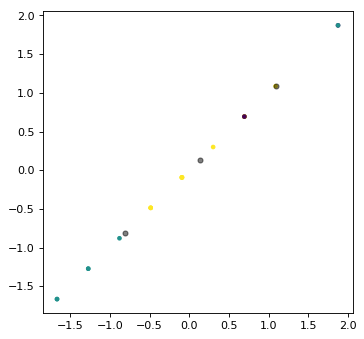

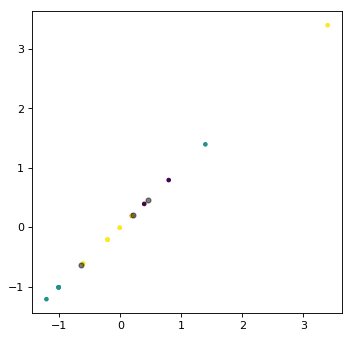

In [52]:
y_kmeans = kmeans.predict(std_data)


for i in range(0,24):
    plt.figure(figsize=(5, 5), dpi=80)
    
    plt.scatter(std_data[:, i], std_data[:, i],c=y_kmeans, s=10, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, i], centers[:, i], c='black', s=20, alpha=0.5);
    


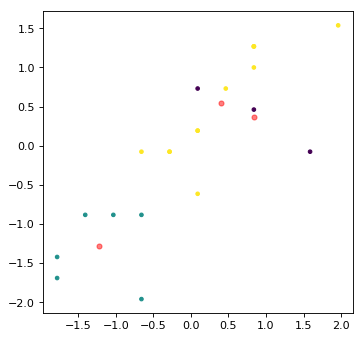

In [53]:

plt.figure(figsize=(5, 5), dpi=80)    
plt.scatter(std_data[:, 0], std_data[:, 1],c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.5);


In [54]:

# !! Get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
mydict

{0: array([ 8, 11, 13], dtype=int64),
 1: array([14, 15, 16, 17, 18, 20], dtype=int64),
 2: array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 12, 19], dtype=int64)}

In [55]:
dataset = pd.read_csv('Cidades-mp-2.5-novo.csv',sep=';',encoding = "ISO-8859-1")
for j in mydict:

    nome_arquivo='Grupo-mp-2.5'+str(j)+'.txt'
    print (nome_arquivo)
    arquivo = open(nome_arquivo, "w")
   
    for m in mydict[j]:
        print(dataset.iloc[m][0])
        arquivo.write('\n')
        arquivo.write(dataset.iloc[m][0])
        
    arquivo.close()

Grupo-mp-2.50.txt
Osasco
Marg.Tiete-Pte
Guarulhos-Pimentas
Grupo-mp-2.51.txt
Pico do Jaragua
S.Jose Campos-Jd.
Taubate
Ribeirao Preto
Piracicaba
São Jose do Rio Preto
Grupo-mp-2.52.txt
Santos-Ponta da Praia
Santana
Parque D.Pedro II
Congonhas
Ibirapuera
Cid.Universitária-USP-
Grajau-Parelheiros
Pinheiros
Guarulhos-Paço
Itaim Paulista
S.Bernardo-Centro
Campinas-V.União


# Aplicando os dados de Mp2.5 ao K-medoids

In [56]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.silhouette import silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import random
std_data = StandardScaler().fit_transform(dados_Limpeza)
silhouette_K_medoids = []

arrayMedois=[0] * 20

for m in range(0,20):
    medoid=[]
    #print(m)
    for j in range(0,m):
        valorRandom=random.randint(0,20)
        
        while valorRandom in medoid:
            #print(valorRandom)
            valorRandom=random.randint(0,20)
        
        medoid.append(valorRandom)
    arrayMedois[m]=(medoid) 
    
##Encontrando o melhor valor de K no k-medoids

def tranformando_saida(arrayMedoid_previsao):
    
    arrayClusters_KMedoid=[0] * 21

    for ite_i in range(len(arrayMedoid_previsao)):
        for ite_j in arrayMedoid_previsao[ite_i]:
            arrayClusters_KMedoid[ite_j ]=ite_i;
    return arrayClusters_KMedoid


print(len(std_data))
    

21


In [57]:
arrayMedois

[[],
 [8],
 [14, 20],
 [18, 6, 8],
 [17, 10, 4, 15],
 [1, 8, 5, 17, 9],
 [15, 12, 10, 1, 9, 4],
 [0, 2, 20, 3, 13, 10, 4],
 [14, 15, 9, 16, 7, 17, 18, 8],
 [15, 8, 18, 12, 10, 5, 0, 11, 14],
 [20, 15, 4, 5, 8, 12, 10, 0, 7, 1],
 [1, 15, 2, 14, 13, 11, 8, 0, 20, 9, 5],
 [7, 4, 9, 16, 19, 2, 12, 11, 1, 14, 18, 0],
 [16, 12, 3, 10, 15, 19, 20, 1, 13, 11, 4, 9, 17],
 [12, 18, 5, 8, 16, 14, 19, 15, 20, 9, 6, 10, 4, 1],
 [6, 1, 15, 12, 5, 10, 14, 11, 3, 7, 19, 2, 16, 0, 13],
 [7, 3, 4, 12, 13, 1, 18, 16, 9, 17, 8, 14, 10, 19, 0, 11],
 [15, 12, 6, 7, 9, 16, 0, 2, 13, 4, 1, 10, 17, 3, 18, 5, 20],
 [13, 2, 6, 15, 12, 4, 9, 14, 20, 19, 8, 10, 17, 3, 7, 1, 5, 16],
 [17, 16, 4, 1, 9, 10, 6, 18, 11, 12, 13, 20, 15, 7, 3, 8, 14, 0, 5]]

Número de Cluster:  2 - valor Coeficiente:  0.31962463349448056
Número de Cluster:  3 - valor Coeficiente:  0.2743115689671616
Número de Cluster:  4 - valor Coeficiente:  0.21353002551788314
Número de Cluster:  5 - valor Coeficiente:  0.04823502506518862
Número de Cluster:  6 - valor Coeficiente:  0.0016094168954936458
Número de Cluster:  7 - valor Coeficiente:  0.023084259127667886
Número de Cluster:  8 - valor Coeficiente:  0.07419101498709554
Número de Cluster:  9 - valor Coeficiente:  0.12089689295631183
Número de Cluster:  10 - valor Coeficiente:  0.09137588502350115
Número de Cluster:  11 - valor Coeficiente:  0.09017854528572042
Número de Cluster:  12 - valor Coeficiente:  -0.011114640699004112
Número de Cluster:  13 - valor Coeficiente:  -0.0539594712918104
Número de Cluster:  14 - valor Coeficiente:  -0.04078107251909549
Número de Cluster:  15 - valor Coeficiente:  0.003252992566510875
Número de Cluster:  16 - valor Coeficiente:  0.0542662073353546
Número de Cluster:  17 - val

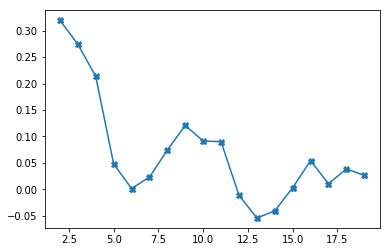

In [58]:
from pyclustering.cluster.clarans import clarans; 
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch

k_medoids_index=[[13,18],[5,13,18],[10,5,13,18],[20,10,5,13,18],[7,20,10,5,13,18],[16,7,20,10,5,13,18],[15,16,7,20,10,5,13,18],[2,15,16,7,20,10,5,13,18],[10,2,15,16,7,20,10,5,13,18]]
#k_medoids_index=[[random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)]]

k_medoid_iteration=2
silhouetteK_medoids = []
for i in range(2,20):
    
    #print(k_medoid_iteration)
    clusterK = kmedoids(std_data[:, 0:24], arrayMedois[k_medoid_iteration])
    clusterK.process()
    resultados_medoid=clusterK.get_clusters()
    #print(resultados_medoid)
   
    prevk_medoid=tranformando_saida(resultados_medoid)
    score_sillhoute_k_medoid = silhouette_score (std_data,prevk_medoid , metric='euclidean')
    print('Número de Cluster: ',i,'- valor Coeficiente: ',score_sillhoute_k_medoid)
    silhouetteK_medoids.append((i,score_sillhoute_k_medoid,)) 
    k_medoid_iteration=k_medoid_iteration+1

plt.plot([w[0] for w in silhouetteK_medoids],[w[1] for w in silhouetteK_medoids], marker="X")

#array_Medois.append(random.randint(0,21))
    #silhouette.append((i,score_sillhoute,))  
#plt.plot([w[0] for w in silhouette],[w[1] for w in silhouette], marker="X")

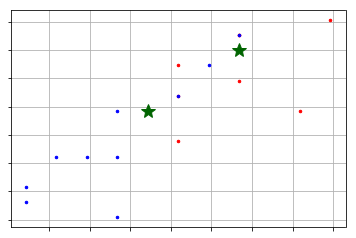

[[3, 1, 2, 6, 8, 9, 10, 11, 13], [4, 0, 5, 7, 12, 14, 15, 16, 17, 18, 19, 20]]

In [60]:



cluster = kmedoids(std_data[:, 0:24], [13,18])


cluster.get_medoids()

cluster.process()

previsoes = cluster.get_clusters()


medoides = cluster.get_medoids()



v = cluster_visualizer()

v.append_clusters(previsoes, std_data[:,0:2])

v.append_cluster(medoides, data = std_data[:,0:2], marker = '*', markersize = 15)


v.show()

previsoes


#medoides




0     1
1     0
2     0
3     0
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    1
16    1
17    1
18    1
19    1
20    1
Name: clustersK-medoids, dtype: int64

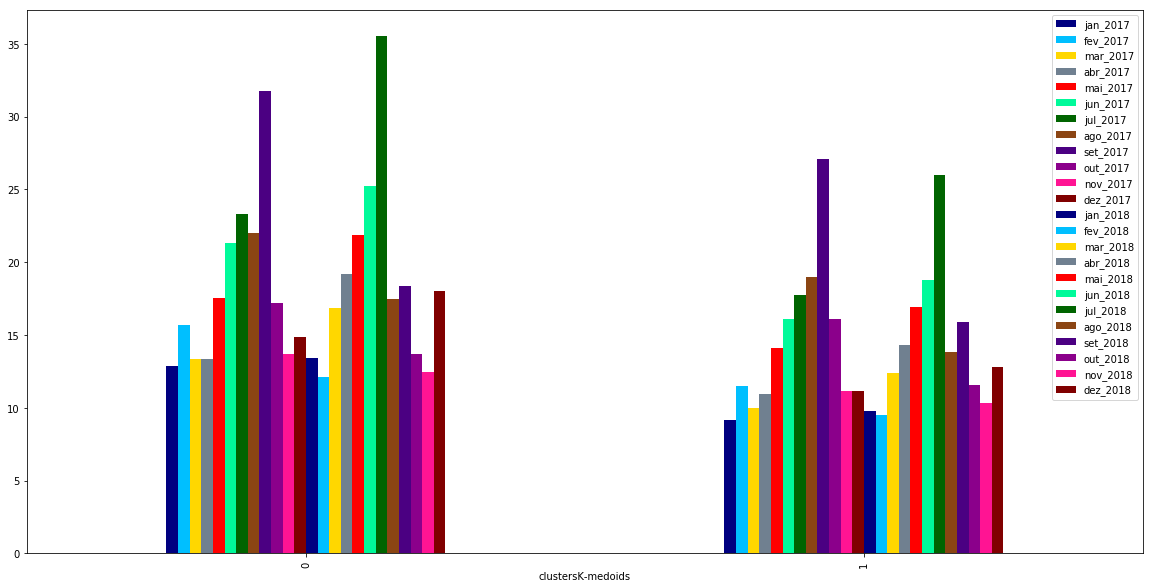

In [62]:
##Criar grafico de barras
arrayClusters=[0] * 21

for i in range(len(previsoes)):
    for j in previsoes[i]:
        arrayClusters[j]=i;
colores=['#000080', '#00BFFF', '#FFD700', '#708090', '#FF0000', '#00FA9A', '#006400', '#8B4513', '#4B0082','#8B008B','#FF1493', '#800000','#000080', '#00BFFF', '#FFD700', '#708090', '#FF0000', '#00FA9A', '#006400', '#8B4513', '#4B0082','#8B008B','#FF1493', '#800000']
dados_Limpeza.drop("clusters", axis=1, inplace=True)
dados_Limpeza["clustersK-medoids"] = arrayClusters
dados_Limpeza.groupby("clustersK-medoids").aggregate("mean").plot(kind = 'bar',color=colores, figsize=(20, 10), fontsize = 10)
dados_Limpeza["clustersK-medoids"]

## Escrevendo em um arquivo os grupos do Mp2.5 

In [63]:
dataset = pd.read_csv('Cidades-mp-2.5-novo.csv',sep=';',encoding = "ISO-8859-1")
for j in range(len(previsoes)):

    nome_arquivo='K-medoids-Grupo-'+str(j)+'-mp-2.5.txt'
    print (nome_arquivo)
    arquivo = open(nome_arquivo, "w")
   
    for m in previsoes[j]:
        
        arquivo.write('\n')
        arquivo.write(dataset.iloc[m][0])
        
    arquivo.close()

K-medoids-Grupo-0-mp-2.5.txt
K-medoids-Grupo-1-mp-2.5.txt
